# Lab: Decision tree

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree
from sklearn import datasets, linear_model
#import graphviz
import matplotlib.pyplot as plt
import math


# 8.3.3 Bagging and Random Forests

This lab exercise applies bagging and random forrest to the Boston dataset. This is done by using the randomForest package in python.
Bagging is a special case of a random forest where m = p. Therefore, the randomForest() function can be used to perform both random forests and bagging.
Bagging is performed on the Boston data set:

In [2]:
boston = datasets.load_boston()

In [3]:
X = boston.data
y = boston.target

In [4]:
# The boston data set is spilt into training and test data for both X and y:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

C:\Users\ida_s\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
# The RandomForestRegressor is used where all_features is set to the max_features so we have: m = p: we use all predictors.
all_features = X_train.shape[1]  # 13
regr_bagging = RandomForestRegressor(max_features=all_features, random_state=1)
regr_bagging.fit(X_train, y_train)

C:\Users\ida_s\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [6]:
# The mean square error is calculator:
y_pred = regr_bagging.predict(X_test)
msr = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', msr)
# The mean squared error is found to be 18.29

Mean squared error:  18.290404743083002


Since we have 13 features we use the max_feature = 4 (close to square root of 13 (3.60555)) when growing the random tree. 
Squareroot of p is used as the number of variables when building a random forest of classification trees.

In [7]:
regr_randomforest = RandomForestRegressor(max_features=4, random_state=1)
regr_randomforest.fit(X_train, y_train)

y_pred = regr_randomforest.predict(X_test)
msr = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', msr)

Mean squared error:  16.893475889328062


C:\Users\ida_s\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


As we see the MSE is less for forest tree than for bagging (16.89 vs. 18.29) we see that random forests yielded an improvement over bagging in this case.

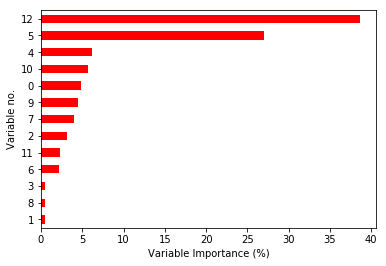

In [8]:
Importance = pd.DataFrame({'Importance':regr_randomforest.feature_importances_*100})
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance (%)')
plt.ylabel('Variable no.')
plt.gca().legend_ = None

In [9]:
print(Importance)

    Importance
0     4.887671
1     0.495932
2     3.177065
3     0.529828
4     6.124730
5    26.998618
6     2.148140
7     3.945945
8     0.505104
9     4.524073
10    5.722647
11    2.327268
12   38.612979


The importance values are based upon the mean decrease of accuracy in predictions on the out of bag samples when a given variable is excluded from the model.

In [10]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

From this we see that the LSTAT (wealth level of the community) and the RM (house size) variables are the most important ones. 

# 8.3.4 Boosting

The GradientBoostingRegressor package is used here. The argument n_estimators=500 indicates that we want 500 trees, and the option interaction.depth=4 limits the depth of each tree.

In [11]:
regr_boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.02, max_depth=4, random_state=1)
regr_boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.02, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=1, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

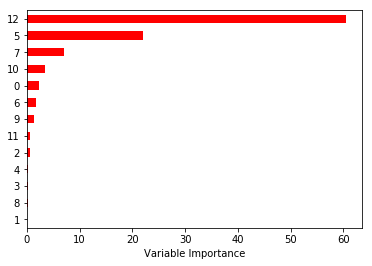

In [12]:
# The feature importance is determined
feature_importance = regr_boost.feature_importances_*100
rel_imp = pd.Series(feature_importance).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [13]:
y_pred = regr_boost.predict(X_test)
msr = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', msr)

Mean squared error:  16.93701485084162


We see again that: the LSTAT (wealth level of the community) and the RM (house size) variables are the most important ones. 
And we see a MSE with a value of 16.94, which is close to the forest tree MSE and therefore, better than the MSE for bagging.